In [1]:
### This script estimate the probability density function for the p-values
# Author: Yiyun
import os
import pandas as pd
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs
from statsmodels.nonparametric.kde import kernel_switch
list(kernel_switch.keys())

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']

In [35]:
dir_sig = './figure4/p-val_distribution'
feature_type = 'histology'
df_all_feat = pd.read_csv(os.path.join(dir_sig,feature_type+'.syn.df_all_forheatmap.062121.csv'),sep = ',')
df_all_feat = pd.read_csv('./figure4/fdr_res/fdr.063021.csv', sep = ',')

In [36]:
df_all_feat = df_all_feat.sort_values('p')
# df_all_feat = df_all_feat[~df_all_feat['gene'].str.startswith('PCDH')]

In [37]:
df_all_feat

,Unnamed: 0,X,gene,p,q,feature,exp.nonexp,FDR
0,1,0,BCL2,0.000000,0.0,Lymph-BNHL,exp,3.544510e-18
27,558993,558992,PCDHGB1,0.000000,0.0,Prost-AdenoCA,exp,3.544510e-18
26,540961,540960,TUBA4A,0.000000,0.0,Breast-AdenoCA,exp,3.544510e-18
25,522929,522928,PCDHGB6,0.000000,0.0,Stomach-AdenoCA,exp,3.544510e-18
24,468836,468835,PCDHGB6,0.000000,0.0,ColoRect-AdenoCA,exp,3.544510e-18
...,...,...,...,...,...,...,...,...
5277,270738,270737,MOBP,0.049996,1.0,Eso-AdenoCA,exp,5.840739e-01
5278,414954,414953,FAM162B,0.049996,1.0,CNS-GBM,exp,5.840438e-01
5279,214,213,FAM105A,0.049997,1.0,Lymph-BNHL,exp,5.840362e-01
5280,36245,36244,CLCN4,0.049997,1.0,Panc-Endocrine,exp,5.840058e-01


In [30]:
df_all_feat[df_all_feat['FDR']<0.1]

,Unnamed: 0,X,gene,p,q,feature,exp.nonexp,FDR
0,1,0,BCL2,0.000000,0.000000,Lymph-BNHL,exp,3.544510e-18
26,540961,540960,TUBA4A,0.000000,0.000000,Breast-AdenoCA,exp,3.544510e-18
20,360641,360640,LONRF3,0.000000,0.000000,Liver-HCC,exp,3.544510e-18
18,324580,324579,SIGLEC15,0.000000,0.000000,Panc-AdenoCA,exp,3.544510e-18
19,324581,324580,TP53I3,0.000000,0.000000,Panc-AdenoCA,exp,3.544510e-18
1,54097,54096,ITLN1,0.000000,0.000000,CNS-PiloAstro,exp,3.544510e-18
28,324582,324581,DMRTB1,0.000001,0.003391,Panc-AdenoCA,exp,8.103587e-18
29,2,1,HIST1H2BK,0.000002,0.016016,Lymph-BNHL,exp,1.300297e-17
33,396705,396704,AKAP2,0.000004,0.076881,Head-SCC,exp,7.872728e-17
36,3,2,NOL9,0.000008,0.050218,Lymph-BNHL,exp,1.440393e-15


In [19]:
dir_fdr = './figure4/FDR_calc'
dir_out = './figure4/p-val_distribution'
feature_type = 'histology'
syn_nsyn = 'syn'
df_syn_heatmap = pd.read_csv(os.path.join(dir_fdr,'fdr_all_genes_062121.csv'))
df_syn_heatmap = df_syn_heatmap[~df_syn_heatmap['gene'].str.startswith('PCDH')]

In [28]:
df_syn_heatmap[df_syn_heatmap['q']<0.1]

,X,gene,p,q,feature,exp.nonexp,FDR
0,0,BCL2,0.000000,0.000000,Lymph-BNHL,exp,1.815567e-33
1,56058,ITLN1,0.000000,0.000000,CNS-PiloAstro,exp,1.815567e-33
18,336351,SIGLEC15,0.000000,0.000000,Panc-AdenoCA,exp,1.815567e-33
19,336352,TP53I3,0.000000,0.000000,Panc-AdenoCA,exp,1.815567e-33
20,373720,LONRF3,0.000000,0.000000,Liver-HCC,exp,1.815567e-33
26,560580,TUBA4A,0.000000,0.000000,Breast-AdenoCA,exp,1.815567e-33
28,336353,DMRTB1,0.000001,0.003391,Panc-AdenoCA,exp,2.042767e-33
29,1,HIST1H2BK,0.000002,0.016016,Lymph-BNHL,exp,2.185813e-33
33,411092,AKAP2,0.000004,0.076881,Head-SCC,exp,2.833847e-33
36,2,NOL9,0.000008,0.050218,Lymph-BNHL,exp,4.341561e-33


In [ ]:
df_all_feat = df_all_feat.sort_values('p')
df_all_feat = df_all_feat[~df_all_feat['gene'].str.startswith('PCDH')]

In [12]:
df_all_feat[df_all_feat['gene'].str.startswith('OR')]

,Unnamed: 0,X,gene,p,q,feature,exp.nonexp,FDR
54,584411,584410,OR4K2,0.000086,0.069016,Skin-Melanoma,nonexp,0.144890
73,108220,108219,OR10J1,0.000184,0.121923,Skin-Melanoma,exp,0.209075
80,584412,584411,OR6Q1,0.000228,0.146235,Skin-Melanoma,nonexp,0.399432
102,108223,108222,OR5AK2,0.000366,0.213637,Skin-Melanoma,exp,0.743462
134,108226,108225,OR1L8,0.000671,0.358985,Skin-Melanoma,exp,0.578381
258,584413,584412,OR11L1,0.002120,0.887847,Skin-Melanoma,nonexp,0.566746
276,234431,234430,OR5D18,0.002292,1.000000,Lung-SCC,exp,0.616308
293,584414,584413,OR1G1,0.002469,0.990868,Skin-Melanoma,nonexp,0.606760
333,584415,584414,OR2J2,0.002911,1.000000,Skin-Melanoma,nonexp,0.581599
411,584416,584415,OR8B4,0.003863,1.000000,Skin-Melanoma,nonexp,0.659534


In [17]:
df_all_feat # 28 genes has pval = 0
idx = df_all_feat[df_all_feat['p']==0].index
df_all_feat.loc[idx, 'p'] = 0.0000001

In [19]:
x = df_all_feat[df_all_feat['p']<1]['p']

(array([2.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 5.000e+00, 3.000e+00, 1.400e+01, 9.000e+00,
        1.400e+01, 1.500e+01, 1.900e+01, 1.900e+01, 2.200e+01, 3.700e+01,
        6.200e+01, 7.000e+01, 9.800e+01, 1.590e+02, 1.840e+02, 2.890e+02,
        3.940e+02, 6.150e+02, 8.710e+02, 1.181e+03, 1.737e+03, 2.650e+03,
        3.815e+03, 5.041e+03, 6.046e+03, 6.869e+03, 7.226e+03, 7.227e+03,
        6.750e+03, 7.051e+03]),
 array([-7.00000000e+00, -6.86000000e+00, -6.72000000e+00, -6.58000000e+00,
        -6.44000000e+00, -6.30000000e+00, -6.16000001e+00, -6.02000001e+00,
        -5.88000001e+00, -5.74000001e+00, -5.60000001e+00, -5.46000001e+00,
        -5.32000001e+00, -5.18000001e+00, -5.04000001e+00, -4.90000001e+00,
        -4.76000001e+00, -4.62000001e+00, -4.48000002e+00, -4.34000002e+

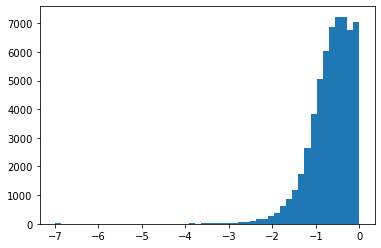

In [22]:
plt.hist(np.log10(x), bins = 50)

In [25]:
kde = sm.nonparametric.KDEUnivariate(x)
kde.fit(kernel = 'gau', bw = 0.05) # Estimate the densities

In [1]:
import statsmodels.api as sm

In [1]:
# import sys
# sys.path.insert(0, '/storage/work/y/yur97/statsmodels')

In [1]:
# import pkg_resources
# pkg_resources.require("statsmodels==0.13.0.dev0+523.g6123002")
from statsmodels.nonparametric.kernels_asymmetric import pdf_kernel_asym

ModuleNotFoundError: No module named 'statsmodels.nonparametric.kernels_asymmetric'

In [5]:
pdf_kernel_asym(x,x,0.005,'beta2')

NameError: name 'x' is not defined

In [16]:
df_exp = df_all_feat[df_all_feat['exp/nonexp'] == 'exp'].sort_values('p')
df_ne = df_all_feat[df_all_feat['exp/nonexp'] == 'nonexp'].sort_values('p')

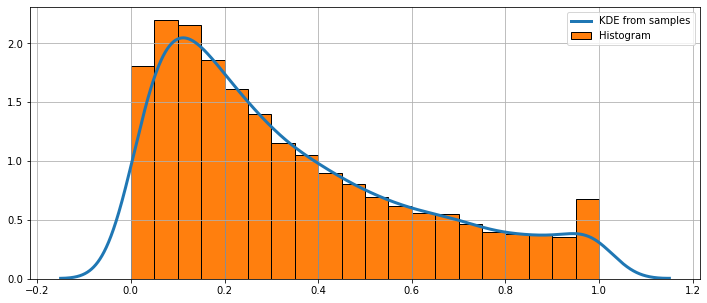

In [27]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Scatter plot of data samples and histogram
# ax.scatter(df_exp['p'], np.abs(np.random.randn(df_exp['p'].size)),
#             zorder=15, color='red', marker='x', alpha=0.5, label='Samples')
# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)

lines = ax.hist(x, bins=20, edgecolor='k', density=True,label='Histogram')
# Plot the samples
# ax.scatter(df_exp['p'], np.abs(np.random.randn(df_exp['p'].size))/40,
#            marker='x', color='red', zorder=20, label='Samples', alpha=0.5)

ax.legend(loc='best')
ax.grid(True, zorder=-5)

In [39]:
sum(kde.density)

1042321.0735586503

In [29]:
kde.support

array([-4.5       , -4.49999046, -4.49998093, ...,  5.49998093,
        5.49999046,  5.5       ])

In [37]:
kde = sm.nonparametric.KDEUnivariate(df['p'])
kde.fit(bw=0.001, kernel = 'gau') # Estimate the densities

In [ ]:
# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)

# Plot the true distribution
true_values = (stats.norm.pdf(loc=dist1_loc, scale=dist1_scale, x=kde.support)*weight1
              + stats.norm.pdf(loc=dist2_loc, scale=dist2_scale, x=kde.support)*weight2)
ax.plot(kde.support, true_values, lw=3, label='True distribution', zorder=15)

# Plot the samples
ax.scatter(obs_dist, np.abs(np.random.randn(obs_dist.size))/40,
           marker='x', color='red', zorder=20, label='Samples', alpha=0.5)

ax.legend(loc='best')
ax.grid(True, zorder=-5)